#### [학습에 필요한 모듈 선언]

In [1]:
import tensorflow as tf
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
# seaborn import error 발생시  pip install seaborn 로 설치
import seaborn as sns


#### [환경설정]

In [2]:
# 학습 데이터 수 선언
# y = class1 인 클래스
Y_class1 = 200
# y = class2 인 클래스
Y_class2 = 200
# y = class3 인 클래스
Y_class3 = 200
# 학습 데이터(훈련/검증/테스트) 비율
trainDataRate = 0.7
validationDataRate = 0.1
# 학습률
learningRate = 0.01
# 총 학습 횟수
totalStep = 10001

#### [빌드단계] Step 1) 학습 데이터 준비

===== Data =====>
          x1         x2         x3         x4         x5       y
0   8.129395  10.992341   8.104283  10.875429   9.732628  class3
1  10.030596   8.826777  10.414516   9.301360   8.819167  class3
2  13.194423   8.518136   8.749465  13.518546   7.343280  class3
3   6.367265   6.449413   4.547888   7.859430   2.725347  class2
4  11.547493  10.979799   9.752420  13.578842  11.388635  class3
           x1         x2        x3         x4        x5       y
595  5.083993   5.046393  3.870268   3.937826  1.947004  class2
596  3.060972  -2.289712 -1.257480   3.877043  3.532501  class1
597  5.246079   2.124267  7.474473   7.799916  3.584603  class2
598  8.334964  12.220503  8.737706  10.636006  6.780932  class3
599  4.887244   3.902188  4.692803   6.634168  3.967666  class2
df_totalTrainData Shape : (600, 6)



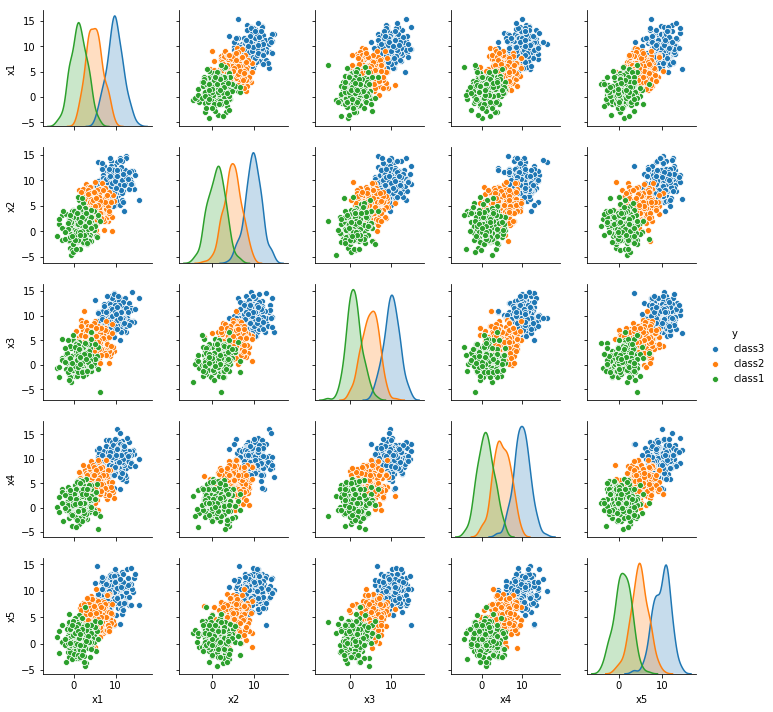

In [3]:
# 시드 설정 : 항상 같은 난수를 생성하기 위하여 수동으로 설정
np.random.seed(321)

### (1) 학습 데이터 생성
# y = class1 인 학습데이터 생성
# 데이터 수
dataNumber_y1 = Y_class1
# 데이터가 평균
mu_y1 = [1,1,1,1,1]
# 데이터 분산된 정도
variance_y1 = 4
# 난수 생성
data_y1 = multivariate_normal(mu_y1, np.eye(5) * variance_y1, dataNumber_y1)
df_y1 = pd.DataFrame(data_y1, columns=['x1','x2','x3','x4','x5'])
df_y1['y'] = 'class1'

# y = class2 인 학습데이터 생성
# 데이터 수
dataNumber_y2 = Y_class2
# 데이터가 평균
mu_y2 = [5,5,5,5,5]
# 데이터 분산된 정도
variance_y2 = 4
# 난수 생성
data_y2 = multivariate_normal(mu_y2, np.eye(5) * variance_y2, dataNumber_y2)
df_y2 = pd.DataFrame(data_y2, columns=['x1','x2','x3','x4','x5'])
df_y2['y'] = 'class2'

# y = class3 인 학습데이터 생성
# 데이터 수
dataNumber_y3 = Y_class3
# 데이터가 평균
mu_y3 = [10,10,10,10,10]
# 데이터 분산된 정도
variance_y3 = 4
# 난수 생성
data_y3 = multivariate_normal(mu_y3, np.eye(5) * variance_y3, dataNumber_y3)
df_y3 = pd.DataFrame(data_y3, columns=['x1','x2','x3','x4','x5'])
df_y3['y'] = 'class3'


# 생성한 데이터를 하나의 DataFrame 으로 합치기
df = pd.concat([df_y1, df_y2, df_y3], ignore_index = True)
# 순서에 상관없이 데이터 정렬
df_totalTrainData = df.reindex(permutation(df.index)).reset_index(drop=True)


# 학습 데이터 확인
print("===== Data =====>")
print(df_totalTrainData.head())
print(df_totalTrainData.tail())
# 학습데이터 shape 확인
print("df_totalTrainData Shape : {}\n".format(df_totalTrainData.shape))

# 학습데이터 전체 그래프 확인
sns.pairplot(df_totalTrainData, hue="y", height = 2)
plt.show()

In [4]:
### (2) 범주형 데이터 y컬럼 데이터 맴핑 선언
# y 컬럼 문자열 데이터를 리스트 형태로 변환
y_mapping = {
    "class1" : [1.0, 0.0, 0.0],
    "class2" : [0.0, 1.0, 0.0],
    "class3" : [0.0, 0.0, 1.0]
}
df_totalTrainData['y'] = df_totalTrainData['y'].map(y_mapping)


print("===== after mapping =====>")
print(df_totalTrainData.head())
print(df_totalTrainData.tail())


===== after mapping =====>
          x1         x2         x3         x4         x5                y
0   8.129395  10.992341   8.104283  10.875429   9.732628  [0.0, 0.0, 1.0]
1  10.030596   8.826777  10.414516   9.301360   8.819167  [0.0, 0.0, 1.0]
2  13.194423   8.518136   8.749465  13.518546   7.343280  [0.0, 0.0, 1.0]
3   6.367265   6.449413   4.547888   7.859430   2.725347  [0.0, 1.0, 0.0]
4  11.547493  10.979799   9.752420  13.578842  11.388635  [0.0, 0.0, 1.0]
           x1         x2        x3         x4        x5                y
595  5.083993   5.046393  3.870268   3.937826  1.947004  [0.0, 1.0, 0.0]
596  3.060972  -2.289712 -1.257480   3.877043  3.532501  [1.0, 0.0, 0.0]
597  5.246079   2.124267  7.474473   7.799916  3.584603  [0.0, 1.0, 0.0]
598  8.334964  12.220503  8.737706  10.636006  6.780932  [0.0, 0.0, 1.0]
599  4.887244   3.902188  4.692803   6.634168  3.967666  [0.0, 1.0, 0.0]


In [5]:
### (3) 훈련, 검증, 테스트 데이터 나누기
# 결과데이터 리스트로 변환
resultColumnName = ['y']
yLabelList = ['class1', 'class2', 'class3']
yList = df_totalTrainData.as_matrix(resultColumnName)
result_dataList = np.array([element1 for element3 in yList
                                        for element2 in element3
                                            for element1 in element2]).reshape(len(yList),3)

# 학습데이터 리스트로 변환
featureColumnName = ['x1','x2','x3','x4','x5']
feature_dataList = df_totalTrainData.as_matrix(featureColumnName)
# trainDataRate, validationDataRate 비율로 데이터 나눔
trainDataNumber = round(len(feature_dataList) * trainDataRate)
validationDataNumber = round(len(feature_dataList) * validationDataRate)
# 훈련 데이터 선언
xTrainDataList = feature_dataList[:trainDataNumber]
yTrainDataList = result_dataList[:trainDataNumber]
# 검증 데이터 선언
xValidationDataList = feature_dataList[trainDataNumber:trainDataNumber+validationDataNumber]
yValidationDataList = result_dataList[trainDataNumber:trainDataNumber+validationDataNumber]
# 테스트 데이터 선언
xTestDataList = feature_dataList[trainDataNumber+validationDataNumber:]
yTestDataList = result_dataList[trainDataNumber+validationDataNumber:]


print("[TrainData Size]\nx : {}, y : {}".format(len(xTrainDataList),len(yTrainDataList)))
print("[ValidationData Size]\nx : {}, y : {}".format(len(xValidationDataList),len(yValidationDataList)))
print("[TestData Size]\nx : {}, y : {}".format(len(xTestDataList),len(yTestDataList)))


[TrainData Size]
x : 420, y : 420
[ValidationData Size]
x : 60, y : 60
[TestData Size]
x : 120, y : 120


#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [7]:
# feature 로 사용할 데이터 갯수
feature_num = len(featureColumnName)
# result 로 사용할 종류 갯수
result_num = len(yLabelList)

# 학습데이터(x : feature)가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32, shape = [None, feature_num])
# 학습데이터(y : result)가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32, shape = [None, result_num])

# Weight 변수 선언
W = tf.Variable(tf.zeros([feature_num, result_num]))
# Bias 변수 선언
b = tf.Variable(tf.zeros([result_num]))

#### [빌드단계] 3) 학습 모델 그래프 구성

In [8]:
# 3-1) 학습데이터를 대표 하는 가설 그래프 선언
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

#### [실행단계] 학습 모델 그래프를 실행

--------------------------------------------------------------------------------
Train(Optimization) Start 
step : 0. cost : 1.098612666130066, accuracy : 0.33095237612724304
step : 1000. cost : 0.5333108901977539, accuracy : 0.8619047403335571
step : 2000. cost : 0.4115321934223175, accuracy : 0.9357143044471741
step : 3000. cost : 0.34549203515052795, accuracy : 0.9547619223594666
step : 4000. cost : 0.30216193199157715, accuracy : 0.9595237970352173
step : 5000. cost : 0.2709597051143646, accuracy : 0.961904764175415
step : 6000. cost : 0.24720239639282227, accuracy : 0.9690476059913635
step : 7000. cost : 0.22841595113277435, accuracy : 0.973809540271759
step : 8000. cost : 0.21314206719398499, accuracy : 0.973809540271759
step : 9000. cost : 0.2004544734954834, accuracy : 0.976190447807312
step : 10000. cost : 0.18973249197006226, accuracy : 0.976190447807312
W : [[-0.21759647  0.01524368  0.20235062]
 [-0.20482178  0.03833586  0.1664812 ]
 [-0.27348518  0.04942771  0.22405553]
 [

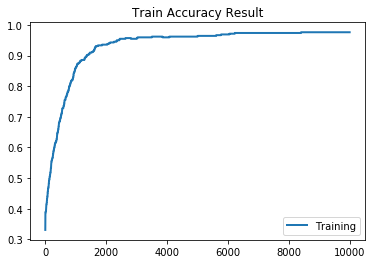

Train Finished
--------------------------------------------------------------------------------
Validation Start
step : 0. cost : 0.1819770783185959, accuracy : 1.0
step : 1000. cost : 0.15691377222537994, accuracy : 0.9833333492279053
step : 2000. cost : 0.14913706481456757, accuracy : 0.9833333492279053
step : 3000. cost : 0.1423015594482422, accuracy : 0.9833333492279053
step : 4000. cost : 0.13621042668819427, accuracy : 0.9833333492279053
step : 5000. cost : 0.13074064254760742, accuracy : 0.9833333492279053
step : 6000. cost : 0.12579694390296936, accuracy : 0.9833333492279053
step : 7000. cost : 0.12130295485258102, accuracy : 0.9833333492279053
step : 8000. cost : 0.11719690263271332, accuracy : 0.9833333492279053
step : 9000. cost : 0.11342794448137283, accuracy : 0.9833333492279053
step : 10000. cost : 0.10995392501354218, accuracy : 0.9833333492279053
W : [[-0.28798214  0.08255772  0.2054329 ]
 [-0.28869995  0.14267388  0.14601989]
 [-0.2692163  -0.04666025  0.31586772]
 [-0

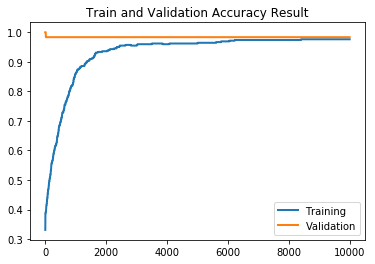

Validation Finished
--------------------------------------------------------------------------------
[Test Result]

Hypothesis : [[1.90917682e-03 6.57581806e-01 3.40508997e-01]
 [1.19474521e-06 8.05432051e-02 9.19455588e-01]
 [9.91785407e-01 8.20888113e-03 5.82922894e-06]
 [1.36894300e-06 2.29809389e-01 7.70189285e-01]
 [9.94809151e-01 5.18845720e-03 2.41954353e-06]
 [3.83183369e-08 5.29373027e-02 9.47062731e-01]
 [9.98996913e-01 1.00302976e-03 1.54608529e-07]
 [1.19852231e-07 5.93912154e-02 9.40608680e-01]
 [1.48292724e-02 9.05208111e-01 7.99625143e-02]
 [2.28843023e-03 7.25520432e-01 2.72191107e-01]
 [9.26689565e-01 7.27020502e-02 6.08340546e-04]
 [1.55283342e-05 2.38240659e-01 7.61743844e-01]
 [8.13713896e-08 7.62973577e-02 9.23702478e-01]
 [1.09034339e-07 3.91509384e-02 9.60848927e-01]
 [8.30157942e-10 8.42380524e-03 9.91576254e-01]
 [5.39392488e-07 1.76796570e-01 8.23202908e-01]
 [9.96107161e-01 3.89168737e-03 1.21853793e-06]
 [2.21409491e-09 2.42348481e-02 9.75765109e-01]
 [7.050

In [9]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())

# 예측값, 정확도 수식 선언
predicted = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

# 학습, 검증 정확도를 저장할 리스트 선언
train_accuracy = list()
validation_accuracy = list()


print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start ")

for step in range(totalStep):
    # X, Y에 학습데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val, W_val, b_val, acc_val, _ = sess.run([costFunction, W, b, accuracy, train],
                                        feed_dict = {X: xTrainDataList, Y: yTrainDataList})
    train_accuracy.append(acc_val)

    if step % 1000 == 0:
        print("step : {}. cost : {}, accuracy : {}"
              .format(step, cost_val, acc_val))

    if step == totalStep-1 :
        print("W : {}\nb:{}".format(W_val, b_val))


# matplotlib 를 이용하여 결과를 시각화
# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.legend()
plt.title("Train Accuracy Result")
plt.show()

print("Train Finished")
print("--------------------------------------------------------------------------------")
print("Validation Start")
for step in range(totalStep):
    # X, Y에 테스트데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val_v, W_val_v, b_val_v, acc_val_v, _ = sess.run([costFunction, W, b, accuracy, train],
                                                feed_dict = {X: xValidationDataList, Y: yValidationDataList})
    validation_accuracy.append(acc_val_v)

    if step % 1000 == 0:
        print("step : {}. cost : {}, accuracy : {}"
              .format(step, cost_val_v, acc_val_v))

    if step == totalStep-1:
        print("W : {}\nb:{}".format(W_val_v, b_val_v))


# matplotlib 를 이용하여 결과를 시각화
# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.plot(range(len(validation_accuracy)), validation_accuracy, linewidth = 2, label = 'Validation')
plt.legend()
plt.title("Train and Validation Accuracy Result")
plt.show()

print("Validation Finished")
print("--------------------------------------------------------------------------------")
print("[Test Result]")
# 최적화가 끝난 학습 모델 테스트
h_val, p_val, a_val = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X: xTestDataList, Y: yTestDataList})
print("\nHypothesis : {} \nPrediction : {} \nAccuracy : {}".format(h_val,p_val,a_val))
print("--------------------------------------------------------------------------------")


#세션종료
sess.close()